# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## 01. Decision Trees
### About this notebook

In this worksheet we will introduce decision trees as a tool to determine redshifts of galaxies.

---

We will use **decision trees** to determine the redshifts of galaxies from their photometric colours. 

We will also have a quick look at how this problem might be approached without using machine learning. This will highlight some of the limitations of the classical approach and demonstrate why a machine learning approach is ideal for this type of problem.





### Introducing the Data

To calculate the redshift of a distant galaxy, we need to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and it is not efficient for large samples and for many galaxies there are no spectroscopic observations.

Therefore we will use another approach to calculate the redshift. This method will use **flux magnitudes** from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. As we have seen before, flux magnitudes are the total flux received in five frequency bands (u, g, r, i and z). The following figure shows the bands correspondig to each of these filters,

<center>
<img
src="https://groklearning-cdn.com/modules/TYPnbyWbJVHGcaNudF4Nak/plot_sdss_filters_11.png"
>
</center>



The dataset is provided as a NumPy structured array in a binary format (.npy) file called 'sdss_galaxy_colors.npy'. 

Complete data about structured arrays in `numpy` can be found at

https://numpy.org/doc/stable/user/basics.rec.html

The first step is to load this file:

In [1]:
import numpy as np

In [2]:
path='' #Define an empty string to use in case of local working

In [3]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/11. Decision Trees/presentation/'

In [5]:
data = np.load(path+'sdss_galaxy_colors.npy')
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In this kind of data structure, the `dtype` attribute corresponds to the name of the features. For our example, we identify the following:

| dtype | Feature|
|:-:|:-:|
|`u` |u band filter|
|`g` |g band filter|
|`r` |r band filter|
|`i` |i band filter|
|`z` |z band filter|
|`spec_class` |spectral class|
|`redshift` |redshift|
|`redshift_err` |redshift error|


In [9]:
data.dtype

dtype([('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In order to show a particular sample, we use



In [10]:
data[1]

(19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703, 1.186625e-05)

In [11]:
data[0:4]

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       (19.05989, 17.49459, 16.59285, 16.09412, 15.70741, b'GALAXY', 0.04427702, 1.062687e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In order to show some particular feature, we use


In [12]:
data['u'] # data for the u filter

array([19.84132, 19.86318, 19.97362, ..., 19.82667, 19.98672, 18.00024])

In [13]:
data['redshift'] # Redshift data

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

The number of samples (galaxies) in this dataset is

In [14]:
n = data.size
n

50000

---
### Correlation between Redshift and Color Indices

The colour index (or astronomical colour) is the difference between the magnitudes of two filters and they are an approximation for the spectrum of the observed object. color indices are useful for classifying stars and/or galaxies into different types. 
For example, consider the color index u - g. If this index is high, the object is brighter in ultra violet frequencies than it is in visible green frequencies.

The final goal is to find a model to predict how the dependent variable (redshift) varies with one or more independent variables (e.g. the colour indices) and an interesting proposal may use regression. Hence, we may first consider a plot to show how these quantities are related. 

**1. Plot the behavior of each of the color indices (u-g, g-i, r-i and i-z) vs the redshift.**

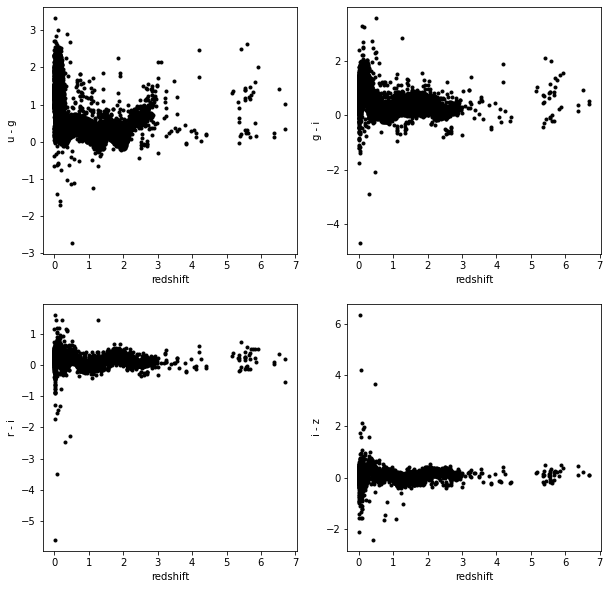

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot of the color indices u-g, g-i, r-i and i-z vs redshift
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(data['redshift'],data['u']-data['g'], color='black', marker='.')
ax[0,1].scatter(data['redshift'],data['g']-data['i'], color='black', marker='.')
ax[1,0].scatter(data['redshift'],data['r']-data['i'], color='black', marker='.')
ax[1,1].scatter(data['redshift'],data['i']-data['z'], color='black', marker='.')
ax[0,0].set_xlabel(r'redshift')
ax[0,0].set_ylabel(r'u - g')
ax[0,1].set_xlabel(r'redshift')
ax[0,1].set_ylabel(r'g - i')
ax[1,0].set_xlabel(r'redshift')
ax[1,0].set_ylabel(r'r - i')
ax[1,1].set_xlabel(r'redshift')
ax[1,1].set_ylabel(r'i - z')
plt.show()

From the plots above, it is clear that there is not a simple linear relation between redshift and any of the color indices. 

Another possibility is to try a multi-variate non-linear regression model. Using a least squares fitting to determine the best fit parameters will give a quite complex model and there is no guarantee that it would yield very promising results.

In order to visualize this option, lets plot a colour-index vs colour-index plot using an additional colour scale to show the redshift. This can be acomplished by using the function `matplotlib.pyplot.scatter` with additional arguments `s`, `c` and `cmap`. The complete information about this function is available at

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

**2. Make a plot with the color indices u-g (in the x-axis) and r-i (in the y axis) vs the redshift (represented by a color gradient for the points)**

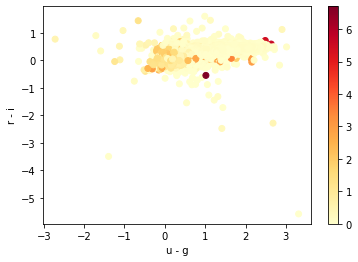

In [41]:
# Color gradient plot representign redshift
# vs. the color indices u-g and r-i

# Recommended colour map
cmap1 = plt.get_cmap('YlOrRd')
plt.scatter(data['u']-data['g'],data['r']-data['i'], c=data['redshift'], cmap=cmap1)
plt.ylabel(r'r - i')
plt.xlabel(r'u - g')
plt.colorbar()
plt.show()

The above plot shows that there are some reasonably well defined regions where redshifts are similar. Therefore, if we can make a contour map of the redshifts in the colour index vs colour index space, we may be able to get an estimate of the redshift for new data points based on a combination of their colour indices. However, due to the points dispersion in the plot, we would have redshift estimates with significant uncertainties.


---
### Decision Trees

**Decision trees** are a machine learning tool that can be used for both **classification** and **regression**. Here, a set of input features are maped to their corresponding output targets. This is done through a series of individual decisions where each decision represents a node (or branching) of the tree. Each decision is made using a single feature of the data and the end point of all the branches is a set of desired target values.

As an example of these tools, consider he following figure, taken from the paper

E. C. Vasconcellos et al. *Decision Tree Clasifiers for Star/Galaxy separation*. AJ 141, 189 (2011).

It shows a decision tree in which the values of some physical properties are used to create the nodes.

<center>
<img src="https://cdn.iopscience.com/images/1538-3881/141/6/189/Full/aj385906f1_lr.jpg">
</center>

The decision at each branch is determined from the training data and by the decision tree learning algorithm. In practice, a particualr algorithm may employ a particular **metric** to find the decision that splits the data most effectively.



In this lesson, we will use the colour indices from photometric imaging as the inputs of the decision tree and the output sill be a photometric redshift. The training data will have an accurate dataset of spectroscopic measurements. Hence, we want to create a decision tree which will look similar to the following figure

<center>
<img src="https://groklearning-cdn.com/modules/5PUcnT5fqRn5wTUXw7kg2B/decisiontree_1.png" width=450>
</center>

Note that each node involves one of calculated colour indices. Following on of the possible paths along the tree results in a target value, corresponding to a particular value of the redshift which is returned as output.






#### Features and Target Sets

In order to calculate the redshift of a galaxy using the color index method, we consider the flux in some band filters to calculate the colour indices u-g, g-i, r-i and i-z. This information is compared, using machine learning tools, with models that predict the behavior of galaxies at different redshifts.

Once we have loaded the data, we need to split this information into input features and their corresponding targets. In this particular case, the inputs will be the 4 colour indices while the targets are the redshifts.

**1. Define a function that receives the data array and returns an array with the 4 colour indices (features) and an array with the redshifts (targets)**

In [63]:
# Function returning the 4 color indices and the redshifts

features = np.asarray([data['u']-data['g'],\
                       data['g']-data['i'],\
                       data['r']-data['i'],\
                       data['i']-data['z'] ])

targets = np.asarray(data['redshift'])
features.shape

(4, 50000)

In [64]:
features = features.T
features.shape

(50000, 4)

### Decision Trees in SciKit Learn

We will the package `SciKit Learn` to implement the decision tree throuf the function `sklearn.tree.DecisionTreeRegressor`.

Similarly to the Linear Model implemented before, the decision tree tool will take a set of input features and the corresponding target values to train (construct) a decision tree model and then, it can be applied to new (or test) data. 

Detailed information about this function is available at

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

#### Construction of the Decision Tree

The decision tree regression learning algorithm is initialised with the commands

In [59]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()

The decision tree is trained using the method `.fit()` and the defined arrays 'features' and 'targets',

In [65]:
dec_tree.fit(features, targets)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Testing the Decision Tree

Once the decision tree is ready, we will use the method `.predict()` to test its predictions. Applying this method to the array 'features' gives  s result an array with the predicted values wich can be compared with the 'targets' array.

In [66]:
predictions = dec_tree.predict(features)

#### Evaluation of the Predictions

In order to evaluate the defined decision tree, we will compare the predictions arrfay generated by the model with the known values given in the 'features' array. The difference between these values are usually called **residuals** and they contain information about the model.

In order to characterize the residuals, we will use the median of the differences between the predictions and the real values, i.e.

\begin{equation}
\text{eval_dec_tree} = \text{median}\left\lbrace \left| \text{predictions}_i - \text{targets}_i \right|\right\rbrace
\end{equation}

**2. Implement the above function to obtain the median of the differences between predictions and targets. Note that we use the absolute value of the diferences!**

In [87]:
eval_dec_tree = np.median(np.abs(predictions - targets))
eval_dec_tree

0.0

#### Implementing Train and Test Sets

The above implementation of the decision tree used the same data for training and testing our decision trees. We already know that this is not the best approach and therefore, we will split the data into training and testing subsets.

**3. Split the 'features' and 'targets' arrays in train and test subsets (50:50)**

In [81]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=60, test_size=0.5)

In [84]:
train_features

array([[1.67968, 1.38425, 0.45047, 0.35708],
       [1.57492, 1.23996, 0.43833, 0.31708],
       [1.72704, 1.21165, 0.3704 , 0.31603],
       ...,
       [2.02259, 1.36587, 0.43889, 0.34207],
       [1.64829, 1.287  , 0.43238, 0.33936],
       [1.27675, 1.03535, 0.3916 , 0.19196]])

In [83]:
test_features

array([[1.18856, 0.67874, 0.25184, 0.13981],
       [2.03467, 1.49211, 0.43888, 0.37667],
       [1.75479, 1.17616, 0.34973, 0.2808 ],
       ...,
       [1.27548, 0.81853, 0.29618, 0.23706],
       [1.10169, 1.12372, 0.46646, 0.09897],
       [1.89668, 1.3267 , 0.4302 , 0.34195]])

**4. Use the training subsets to create the decision tree.**

In [85]:
d_tree = DecisionTreeRegressor()
d_tree.fit(train_features, train_targets)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**5. Use the test subsets to predict the redshift for the test set and use the results to evaluate the model.**

In [88]:
predictions_d_tree = d_tree.predict(test_features)
eval_d_tree = np.median(np.abs(predictions_d_tree - test_targets))
eval_d_tree

0.022095600000000003

---

### Interpretation of the Evaluation of the Model

A result of $\approx 0.02$ in the median of the differences means that half of the samples have a error in the prediction of $< 0.02$.

Choosing the median of the differences as the accuracy measure gives a good representation of the errors, especially when the distribution of errors is skewed. 